# TRABAJO PRÁCTICO ANÁLISIS NUMÉRICO I
##Facultad de Ingenieria (UBA)
####Primer cuatrimestre 2021
#### Curso: Sassano
##Integrantes: 
*   MELINA LAZZARO -  mlazzaro@fi.uba.ar - 105931
*   JOAQUIN SINGER - josinger@fi.uba.ar - 105854 
*   AGUSTINA BOCACCIO - abocaccio@fi.uba.ar - 106393

####Lenguaje elegido: Python







### Aclaracion: 
####Es necesario ejecutar todos los bloques de codigo en orden para correr los algoritmos implementados, ya que, a fin de no repetir codigo, algunas partes usan las variables o funciones definidas arriba (se puede hacer contrayendo la seccion que se quiera ejecutar y corriendo todo junto).

##1. Métodos para seres queridos

En el marco de la época de la pandemia poder ayudar a los seres queridos es lo más importante que podemos hacer.

####(a) Buscar la forma de implementar un método visto en clase para ayudar o apoyar a un ser querido. De no ser posible dar un ejemplo de un uso de los métodos vistos en clase para el área en que se desarrollen profesionalmente.

Debido a la pandemia y a la consecuente suspensión de las clases presenciales en los colegios, es muy importante ayudar a nuestros seres queridos de temprana edad en las actividades escolares, en especial, a los niños que estan en la primaria, cuya educacion elemental es vital para su desarrollo. Por este motivo, una buena idea para enseñarles los niños y niñas el abecedario y el uso del diccionario, es usando el metodo de bisección. 

Primero, elegimos la palabra que necesitamos encontrar. Luego abrimos el dicionario por la mitad y le preguntamos al niño si la letra en la que nos encontramos va antes o después de la primera letra de la palabra buscada (de esta forma también repasamos el abecedario). Después, si nos encontramos después de la primera letra de la palabra buscada, nos quedamos con la primera mitad del diccionario (o en la segunda si nos encontramos antes). Posteriormente repetimos el proceso hasta encontrar la palabra buscada, ayudando a nuestro ser querido a aprender a usar el diccionario y repasando el abecedario con él, todo guiándonos con el método de la bisección. 

####(b) Comentar la experiencia.

Mediante esta forma de aprendizaje usando el método de la bisección y acompañando a nuestro ser querido en cada paso, ayudamos a que lo aprendido en las clases virtuales por el niño sea mejor comprendido. De forma didáctica, siguiendo el paso a paso del método de la bisección y repasando el abecedario, puede aprender a usar el diccionario, adquiriendo un conocimiento clave para su desarrollo cognitivo.

## 2. Hallar $\pi$ por dos caminos



####(a) Programar un algoritmo para aproximar $\pi$ utilizando la funcion $\sin{x}$ con el metodo de Newton-Raphson, en funcion de $x$, que realice iteraciones hasta alcanzar el limite de la herramienta utilizada.

In [1]:
import numpy as np
import math

def F(x):
  return math.sin(x)

def dF(x):
  return math.cos(x)

# f debe ser una función continua
# si la derivada se anula, devuelve el resultado de la ultima iteracion
def newton_raphson(x0, f, df, max_iteraciones, cota_error):

  if (df(x0) == 0):
    print("Error: division por cero")
    return None

  historial = []
  xn = (x0 - f(x0)/df(x0))
  xa = x0
  error = abs(xn - xa)

  #print("  n  |        Xn-1       |         Xn        |    Error")
  #print("    0|          -        | %.15f |     -" % (x0) )
  #print("    1| %.15f | %.15f | %.15f" % (x0, xn, error) )
  historial.append({'xn': xn, 'error': error})

  i = 2
  while ( (error > cota_error) and (i < max_iteraciones) ):
    if (df(xn) == 0):
      print("Error: division por cero")
      break
    xa = xn
    xn = (xa - f(xa)/df(xa))
    error = abs(xn - xa)
    #print(" %4i| %.15f | %.15f | %.15f" % (i, xa, xn, error) )
    historial.append({'xn': xn, 'error': error})
    i+=1

  return historial

####(b) Programar un algoritmo para aproximar $\pi$ utilizando la serie de Leibniz, en funcion de $n$.

In [2]:
def leibniz(n):
  suma = 0
  for i in range(0, n):
    suma += ((-1)**i)/(2*i + 1)

  return suma*4

####(c) Ejecutar los programas solicitados en a y b utilizando representacion de punto flotante de 32 bits y comparar las respuestas obtenidas con n = 10, n = 100, n = 1000, n = 10000 y n = 100000.

In [3]:
import numpy as np

def leibniz32(n):
  suma = 0
  for i in range(0, n):
    suma += np.float32(((-1)**i)/(2*i + 1))

  return  np.float32(suma*4)

print("Con la serie de Leibniz en 32 bit se obtiene:\n")
print("Con n=10:     %f" %leibniz32(10))
print("Con n=100:    %f" %leibniz32(100))
print("Con n=1000:   %f" %leibniz32(1000))
print("Con n=10000:  %f" %leibniz32(10000))
print("Con n=100000: %f" %leibniz32(100000))

Con la serie de Leibniz en 32 bit se obtiene:

Con n=10:     3.041840
Con n=100:    3.131593
Con n=1000:   3.140593
Con n=10000:  3.141493
Con n=100000: 3.141582


In [4]:
import numpy as np

def newton_raphson32(x0, f, df, max_iteraciones, cota_error):

  if (df(x0) == 0):
    print("Error: division por cero")
  
  xn = np.float32(x0 - f(x0)/df(x0))
  xa = x0
  error = abs(xn - xa)

  print("  n  |   Xn-1   |    Xn    |  Error")
  print("    0|     -    | %.6f |    -" % (np.float32(x0)) )
  print("    1| %.6f | %.6f | %.6f" % (np.float32(x0), np.float32(xn), np.float32(error)) )

  i = 2
  while ( (error > 0) and (i < max_iteraciones) ):
    if (df(xn) == 0):
      print("Error: division por cero")
      break 
    xa = xn
    xn = np.float32(xa - f(xa)/df(xa))
    error = abs(xn - xa)
    print(" %4i| %.6f | %.6f | %.6f" % (i, np.float32(xa), np.float32(xn), np.float32(error)) )
    i+=1

  return np.float32(xn)


max_iteraciones = 100
semilla = 3
cota_error = 1e-6

print ("\nCon el metodo de Newton Raphson en 32bit se obtiene raiz = %.6f ± 0.000001" %newton_raphson32(semilla, F, dF, max_iteraciones, cota_error) )

  n  |   Xn-1   |    Xn    |  Error
    0|     -    | 3.000000 |    -
    1| 3.000000 | 3.142547 | 0.142547
    2| 3.142547 | 3.141593 | 0.000954
    3| 3.141593 | 3.141593 | 0.000000

Con el metodo de Newton Raphson en 32bit se obtiene raiz = 3.141593 ± 0.000001


####(d) Ejecutar los programas solicitados en a y b utilizando representacion de punto flotante de $64$ bits y comparar las respuestas obtenidas con $n = 10$, $n = 100$, $n = 1000$, $n = 10000$ y $n = 100000$.

In [5]:
print("Con la serie de Leibniz en 64 bit se obtiene:\n")
print("Con n=10:     %.15f" %leibniz(10))
print("Con n=100:    %.15f" %leibniz(100))
print("Con n=1000:   %.15f" %leibniz(1000))
print("Con n=10000:  %.15f" %leibniz(10000))
print("Con n=100000: %.15f" %leibniz(100000))

Con la serie de Leibniz en 64 bit se obtiene:

Con n=10:     3.041839618929403
Con n=100:    3.131592903558554
Con n=1000:   3.140592653839794
Con n=10000:  3.141492653590034
Con n=100000: 3.141582653589720


In [6]:
max_iteraciones = 100
semilla = 3
cota_error = 1e-14

print ("\nCon el metodo de Newton Raphson en 64bit se obtiene pi = %.14f +- 0.00000000000001" %newton_raphson(semilla, F, dF, max_iteraciones, cota_error).pop()['xn'] )


Con el metodo de Newton Raphson en 64bit se obtiene pi = 3.14159265358979 +- 0.00000000000001


####(e) Ejecutar los programas solicitados en a y b con una calculadora (aclarar marca y modelo) y comparar las respuestas obtenidas con $n = 10$, $n = 100$, $n = 1000$, $n = 10000$ y $n = 100000$ (en caso de no alcanzar la memoria de la calculadora utilizar el maximo n posible).

Modelo `casio fx-570LA X`

Cantidad de dígitos usados internamente en el cálculo: 15

Precisión: $\pm 1$ en el 10° dígito para un cálculo individual. La precisión con con visualización exponencial en $\pm 1$ sobre el dígito menos significativo. En el caso de cálculos consecutivos los errores se propagan acumulativamente.

Leibniz:

  * con $n=10$:  $3,232315809$

  * con $n=100$:  $3,151493401$

  * con $n=1000$:  $3,142591654$

  * con $n=10000$:  $3,141692644$  
  * con $n=100000: 3,141602653$


Newton Raphson:

  * $\pi = 3,141592654$

####(f) Representar las dos respuestas finales obtenidas (para n= 100000 y el ḿetodo de NewtonRaphson) en c, d y e de manera de expresarlo como $\pi= \bar{\pi} + ∆\pi $ 

In [7]:
error_leibniz = abs(leibniz(100000) - leibniz(100001))
error_leibniz32 = abs(leibniz32(100000) - leibniz32(100001))
print('El error utilizando la serie de leibniz en 64 bits con n = 100000 es', error_leibniz)
print('El error utilizando la serie de leibniz en 32 bits con n = 100000 es', error_leibniz32)

El error utilizando la serie de leibniz en 64 bits con n = 100000 es 1.999990000056684e-05
El error utilizando la serie de leibniz en 32 bits con n = 100000 es 2.002716e-05


Con el metodo Newton-Raphson en 64bit: $\pi= 3.14159265358979 \pm 0.00000000000001$

Con el metodo Newton-Raphson en 32bit: $\pi= 3.141593 \pm 0.000001$

Con la calculadora:  $\pi= 3.141592654 \pm 0.000000001$

Con la serie de Leibniz en 64bit: $\pi= 3.14158 \pm 2 \cdot 10^{-5}$

Con la serie de Leibniz en 32bit: $\pi= 3.14158 \pm 3 \cdot 10^{-5}$

Con la calculadora: $\pi= 3.1416 \pm 0.0001$

####(g)  Podemos afirmar qué para la computadora el número $\pi$ es una constante?


$\pi$ no es una constante para la computadora porque cada número en ella se representa mediante un número finito de dígitos, el cual es llamado conjunto de numeros de punto flotante y sólo contiene números racionales. Como $\pi$ es un numero irracional, su representacion en la computadora va a variar segun la arquitectura de la misma y va a tener una cota de error determinada.


## 3. Búsqueda de raíces


Para las siguientes funciones continuas y con raíz unica en el intervalo $[0,2]$:

$f_1(x) =x^2−2$

$f_2(x) =x^5−6.6x^4+ 5.12x^3+ 21.312x^2−38.016x+ 17.28$

$f_3(x) = (x−1.5)e^{-4(x−1.5)^2}$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

x = np.linspace(0, 2, 100)
f1 = (x**2 - 2)
f2 = (x**5 - 6.6*x**4 + 5.12*x**3 + 21.312*(x**2) - 38.016*x + 17.28)
f3 = ((x-1.5)*np.exp(-4*((x-1.5)**2)) )

####(a) Graficar las funciones en el intervalo de interes

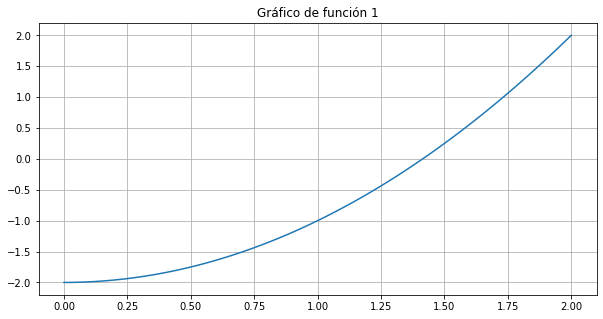

In [9]:
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f1)
plt.title('Gráfico de función 1')
plt.grid()

plt.show()

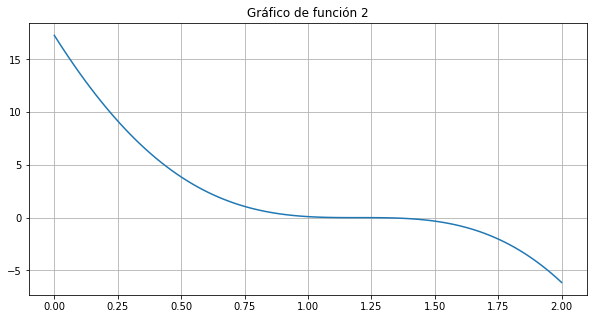

In [10]:
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f2)
plt.title('Gráfico de función 2')
plt.grid()

plt.show()

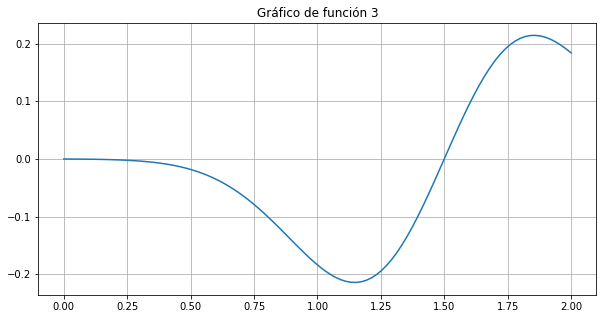

In [11]:
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f3)
plt.title('Gráfico de función 3')
plt.grid()

plt.show()

####(b) Halle para cada una de ellas la raíz en el intervalo indicado mediante los métodos vistos en clase (Bisección, Newton-Raphson, Newton-Raphson modificado, Secante). Use para todos los métodos como criterio de parada las siguientes cotas de error: $1.10^{-5}$; $1.10^{-13}$, para Newton-Raphson use semilla $x_0 = 1,0$, para secante use como semillas los extremos del intervalo.

In [12]:
def f1(x):
  return (x**2 - 2)

def df1(x):
  return(2*x)

def ddf1(x):
  return(2)

def f2(x):
  return (x**5 - 6.6*(x**4) + 5.12*(x**3) + 21.312*(x**2) - 38.016*x + 17.28)

def df2(x):
  return (5*(x**4) - 26.4*(x**3) + 15.36*(x**2) + 42.624*x - 38.016)

def ddf2(x):
  return (20*(x**3) - 79.2*(x**2) + 30.72*x +  42.624)

def f3(x):
  return ((x-1.5)*np.exp(-4*((x-1.5)**2)))

def df3(x):
  return ((-8*x + 12)*(x - 1.5)*np.exp(-4*((x-1.5)**2)) + np.exp(-4*((x-1.5)**2)))

def ddf3(x):
  return ((-24*x + (x - 1.5)*(8*x - 12))*np.exp(-4*((x-1.5)**2)))

cota_1 = 1*(10**-5)
cota_2 = 1*(10**-13)

semilla = 1
max_iteraciones = 999999

In [13]:
def biseccion_aux(px, a, b, f, cota_error, iteraciones_restantes, historial):
  py = (a+b)/2

  if( abs(px - py) < cota_error or iteraciones_restantes <= 0 ):
    return py
  
  if ( (f(py) > 0 and f(a) < 0) or (f(py) < 0 and f(a) > 0) ):
      b = py
  elif ( (f(py) > 0 and f(b) < 0) or (f(py) < 0 and f(b) > 0) ):
      a = py

  historial.append({'xn': py, 'error': abs(px - py)})
  return biseccion_aux(py, a, b, f, cota_error, iteraciones_restantes-1, historial)

def biseccion(a, b, f, cota_error, max_iteraciones):

  if (f(a)*f(b) > 0):
    return None

  historial = []

  p0 = (a + b)/2
  historial.append({'xn': p0, 'error': abs(p0 - a)})
  if ( (f(p0) > 0 and f(a) < 0) or (f(p0) < 0 and f(a) > 0)):
    b = p0
  elif ( (f(p0) > 0 and f(b) < 0) or (f(p0) < 0 and f(b) > 0) ):
    a = p0
  
  biseccion_aux(p0, a, b, f, cota_error, max_iteraciones, historial)
  return historial

In [14]:
def newton_raphson_modificado(x0, f, df, ddf, max_iteraciones, cota_error):

  if (df(x0) == 0):
    print("Error: division por cero")

  historial = []

  xn = (x0 - (f(x0) * df(x0))/(df(x0)**2 - f(x0)*ddf(x0)))
  xa = x0
  error = abs(xn - xa)
  historial.append({'xn': xn, 'error': error})
  #print("  n  |        Xn-1       |         Xn        |    Error")
  #print("    0|          -        | %.15f |     -" % (x0) )
  #print("    1| %.15f | %.15f | %.15f" % (x0, xn, error) )

  i = 2
  while ( (error > cota_error) and (i < max_iteraciones) ):
    if (df(xn) == 0):
      print("Error: division por cero")
      break
    xa = xn
    xn = (xa - (f(xa) * df(xa))/(df(xa)**2 - f(xa)*ddf(xa)))
    error = abs(xn - xa)
    historial.append({'xn': xn, 'error': error})
    #print(" %4i| %.15f | %.15f | %.15f" % (i, xa, xn, error) )
    i+=1

  return historial

In [15]:
def secante(f, x0, x1, tolerancia, max_iteraciones):

    historial = []

    error = abs(x0-x1)

    i = 0
    pn = x1
    historial.append({'xn': pn, 'error': error})

    while error > tolerancia and i < max_iteraciones :
        if (f(x1) == f(x0)):
            print("Error: division por cero")
            break
        pn = x1 - ( (f(x1)*(x1-x0))/(f(x1)-f(x0)) )
        x0=x1
        x1=pn
        error = abs(x0-x1)
        historial.append({'xn': pn, 'error': error})
    
    return historial

In [16]:
def buscar_raices(f, df, ddf):
  print("biseccion cota 1: ", (biseccion(0, 2, f, cota_1, max_iteraciones)).pop()['xn'])
  print("biseccion cota 2: ", (biseccion(0, 2, f, cota_2, max_iteraciones)).pop()['xn'])
  print("NR cota 1:        ", (newton_raphson(semilla, f, df, max_iteraciones, cota_1)).pop()['xn'])
  print("NR cota 2:        ", (newton_raphson(semilla, f, df, max_iteraciones, cota_2)).pop()['xn'])
  print("NR modf cota 1:   ", (newton_raphson_modificado(semilla, f, df, ddf, max_iteraciones, cota_1)).pop()['xn'])
  print("NR modf cota 2:   ", (newton_raphson_modificado(semilla, f, df, ddf, max_iteraciones, cota_2)).pop()['xn'])
  print("Secante cota 1:   ", (secante(f, 0, 2, cota_1, max_iteraciones)).pop()['xn'])
  print("Secante cota 2:   ", (secante(f, 0, 2, cota_2, max_iteraciones)).pop()['xn'], "\n")

print('---- Función 1 ----')
buscar_raices(f1, df1, ddf1)

print('---- Función 2 ----')
buscar_raices(f2, df2, ddf2)

print('---- Función 3 ----')
buscar_raices(f3, df3, ddf3)


---- Función 1 ----
biseccion cota 1:  1.4141998291015625
biseccion cota 2:  1.4142135623729928
NR cota 1:         1.4142135623746899
NR cota 2:         1.414213562373095
NR modf cota 1:    1.4142135623715002
NR modf cota 2:    1.4142135623730951
Secante cota 1:    1.4142135626888697
Secante cota 2:    1.414213562373095 

---- Función 2 ----
biseccion cota 1:  1.1999969482421875
biseccion cota 2:  1.2000045776367188
NR cota 1:         1.1999826569716792
NR cota 2:         1.200007374996903
NR modf cota 1:    1.1999999399606254
NR modf cota 2:    1.199999711987405
Secante cota 1:    1.2000295863941581
Secante cota 2:    1.2000075135841288 

---- Función 3 ----
biseccion cota 1:  1.5
biseccion cota 2:  1.5
Error: division por cero
NR cota 1:         -12.156854343644003
Error: division por cero
NR cota 2:         -12.156854343644003
NR modf cota 1:    1.1464141975554574
NR modf cota 2:    1.14644660940642
Secante cota 1:    -12.136744318261051
Secante cota 2:    -12.136744318261051 



Podemos observar que usando el método de Newton-Raphson y con el método de la secante en la tercera función, este no converge y no encuentra la raiz. Esto es debido a que en la definicion de Newton-Raphson, suponemos que la semilla es un valor cercano a la raiz, ya que de esta manera se puede despreciar el termino cuadratico del polinomio de Taylor (a partir del cual se define este método). En este caso, la semilla no está lo suficientemente cerca de la raiz, entonces no se puede hallar el cero de la función con ella. 

De la demostracion de NR: 

$f(x)=f(\bar{x}) + (x- \bar{x})f'( \bar{x}) +  \frac{(x- \bar{x})^2}{2} f''( \bar{x})$


$0=f(\bar{x}) + (p- \bar{x})f'( \bar{x}) +  \frac{(p- \bar{x})^2}{2} f''( \bar{x})$

Debemos tener una semilla cercana a la raiz porque suponemos que $(p- \bar{x})^2$ es un termino muy chico y nos permite despreciar el ultimo termino.

Por este motivo, volvemos a analizar la raiz de la funcion 3 con mejores semillas (las cuales pueden conseguirse aplicandole el metodo de la bisección primero para acercarnos mejor a la raiz y a partir de ella usar el método de NR)

In [17]:
semilla = 1.7
semilla_2 = 1.4
print("NR cota 1:        ", (newton_raphson(semilla, f3, df3, max_iteraciones, cota_1)).pop()['xn'])
print("NR cota 2:        ", (newton_raphson(semilla, f3, df3, max_iteraciones, cota_2)).pop()['xn'])
print("NR modf cota 1:   ", (newton_raphson_modificado(semilla, f3, df3, ddf3, max_iteraciones, cota_1)).pop()['xn'])
print("NR modf cota 2:   ", (newton_raphson_modificado(semilla, f3, df3, ddf3, max_iteraciones, cota_2)).pop()['xn'])
print("Secante cota 1:   ", secante(f3, semilla_2, semilla, cota_1, max_iteraciones).pop()['xn'])
print("Secante cota 2:   ", secante(f3, semilla_2, semilla, cota_2, max_iteraciones).pop()['xn'], "\n")

NR cota 1:         1.5000000000000002
NR cota 2:         1.5
NR modf cota 1:    1.5000000000135387
NR modf cota 2:    1.5
Secante cota 1:    1.4999999999971618
Secante cota 2:    1.5 



####(c) Halle la raíz mediante la función de búsqueda de raíces de un lenguaje o paquete orientado a cálculo numérico (e.g. `Python+SciPy: scipy.optimize.brentq`).

In [18]:
from scipy.optimize import brentq

print(brentq(f1, 0, 2))
print(brentq(f2, 0, 2))
print(brentq(f3, 0, 2))

1.4142135623731364
1.2000081652661798
1.5000000000000198


####(d) Compare los resultados obtenidos para los distintos métodos y cotas, grafique el orden de convergencia P y la constante asisntotica λ para todos los casos. Discuta ventajas y desventajas. ¿Son las que esperaba en base a la teoría?


In [19]:
#los errores son la diferencia con la iteracion anterior
#calcula el orden de convergencia para una iteracion pn
def orden_de_convergencia(error_pn, error_pn_mas_uno, error_pn_menos_uno):

  if abs(error_pn) < 1e-14 or abs(error_pn_mas_uno) < 1e-14 or abs(error_pn_menos_uno) < 1e-14 or abs(np.log10(abs(error_pn/error_pn_menos_uno))) < 1e-14:
    return None

  return np.log10(abs(error_pn_mas_uno/error_pn))/np.log10(abs(error_pn/error_pn_menos_uno))

#p es la raiz
#calcula la constante de error asintotica para una iteracion pn
def constante_asistotica(pn, pn_mas_uno, p, orden_de_convergencia):
    if pn == p or orden_de_convergencia is None:
        return None
        
    return abs(pn_mas_uno - p)/(abs(pn - p)**orden_de_convergencia)

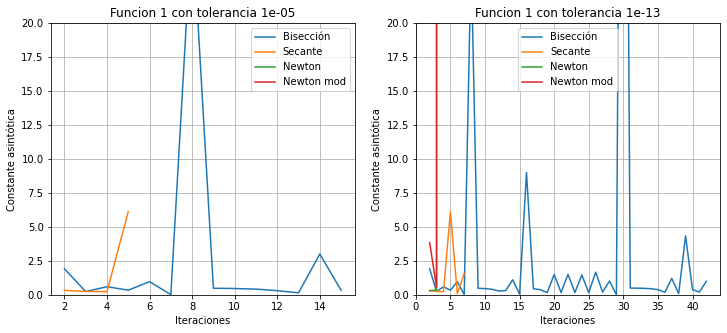

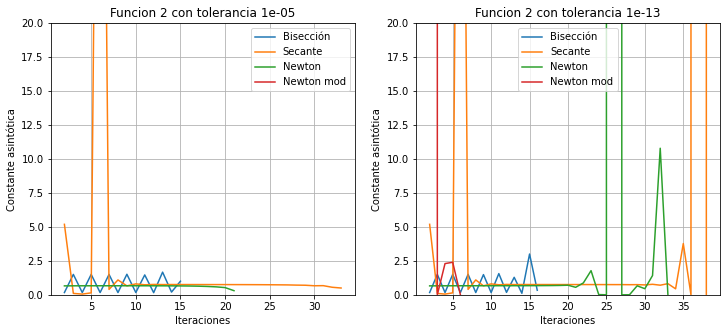

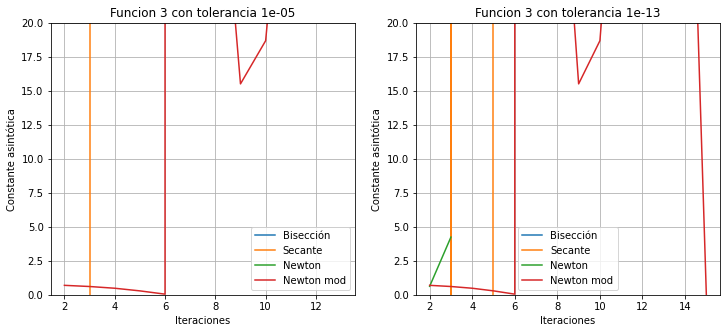

In [20]:
#dado el historial de iteraciones calcula la constante de error asintotica para cada una
def calcular_constante_asintotica(historial):

  ns = [None, None]
  while len(historial) > 3:
    convergencia = orden_de_convergencia((historial[1])['error'], (historial[2])['error'], (historial[0])['error'])
    ns.append(constante_asistotica((historial[1])['xn'],(historial[2])['xn'], (historial[-1])['xn'], convergencia))
    historial.pop(0)
  return ns

def graficar_constante_asintotica(f, df, ddf, semilla, semilla_1, semilla_2, cota_error_1, cota_error_2, nombre_funcion):

  constante_asintotica_biseccion = calcular_constante_asintotica(biseccion(0, 2, f, cota_error_1, max_iteraciones))
  constante_asintotica_secante = calcular_constante_asintotica(secante(f, semilla_1, semilla_2, cota_error_1, max_iteraciones))
  constante_asintotica_newton = calcular_constante_asintotica(newton_raphson(semilla, f, df, 100, cota_error_1))
  constante_asintotica_newton_mod = calcular_constante_asintotica(newton_raphson_modificado(semilla, f, df, ddf, 100, cota_error_1))

  fig, axs = plt.subplots(1,2,figsize=(12,5))
  axs[0].plot(constante_asintotica_biseccion, label='Bisección')
  axs[0].plot(constante_asintotica_secante, label='Secante')
  axs[0].plot(constante_asintotica_newton, label='Newton')
  axs[0].plot(constante_asintotica_newton_mod, label='Newton mod')
  axs[0].set_ylim([0, 20])
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('Constante asintótica')
  axs[0].set_title(nombre_funcion + ' con tolerancia ' + str(cota_error_1))
  axs[0].grid()
  axs[0].legend()

  constante_asintotica_biseccion = calcular_constante_asintotica(biseccion(0, 2, f, cota_error_2, max_iteraciones))
  constante_asintotica_secante = calcular_constante_asintotica(secante(f, semilla_1, semilla_2, cota_error_2, max_iteraciones))
  constante_asintotica_newton = calcular_constante_asintotica(newton_raphson(semilla, f, df, 100, cota_error_2))
  constante_asintotica_newton_mod = calcular_constante_asintotica(newton_raphson_modificado(semilla, f, df, ddf, 100, cota_error_2))

  axs[1].plot(constante_asintotica_biseccion, label='Bisección')
  axs[1].plot(constante_asintotica_secante, label='Secante')
  axs[1].plot(constante_asintotica_newton, label='Newton')
  axs[1].plot(constante_asintotica_newton_mod, label='Newton mod')
  axs[1].set_ylim([0, 20])
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Constante asintótica')
  axs[1].set_title(nombre_funcion + ' con tolerancia ' + str(cota_error_2))
  axs[1].grid()
  axs[1].legend()

  plt.show()
  #print(ns)

graficar_constante_asintotica(f1, df1, ddf1, 1, 0, 2, cota_1, cota_2, 'Funcion 1')
graficar_constante_asintotica(f2, df2, ddf2, 1, 0, 2, cota_1, cota_2, 'Funcion 2')
graficar_constante_asintotica(f3, df3, ddf3, 1.7, 1.4, 1.7, cota_1, cota_2, 'Funcion 3')
#graficar_constante_asintotica(newton_raphson(semilla, f1, df1, 100, cota_error))
#graficar_constante_asintotica(newton_raphson(0.45, f2, df2, 100, cota_error))
#graficar_constante_asintotica(newton_raphson(semilla, f3, df3, 100, cota_error))


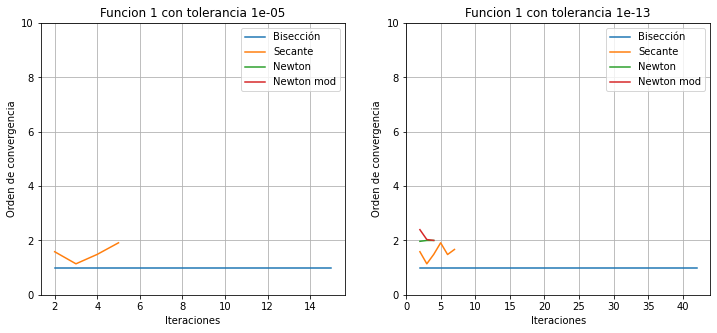

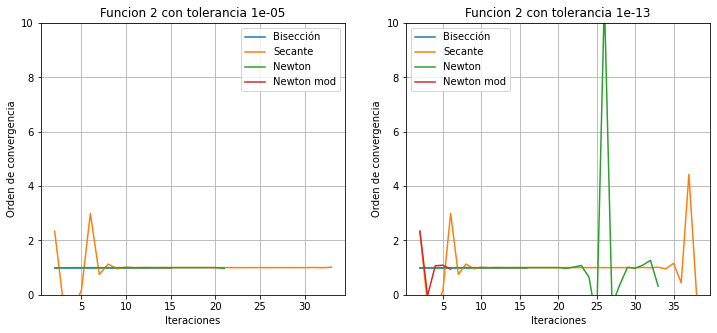

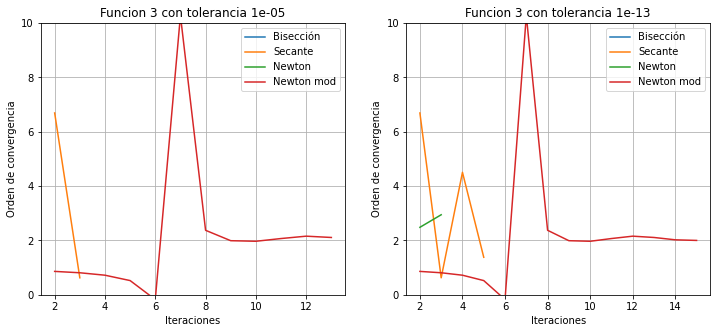

In [21]:
#dado el historial de iteraciones calcula la convergencia para cada una
def calcular_convergencia(historial):

  ns = [None, None]
  while len(historial) > 3:
    convergencia = orden_de_convergencia((historial[1])['error'], (historial[2])['error'], (historial[0])['error'])
    ns.append(convergencia)
    historial.pop(0)
  return ns

def graficar_convergencia(f, df, ddf, semilla, semilla_1, semilla_2, cota_error_1, cota_error_2, nombre_funcion):

  convergencia_biseccion = calcular_convergencia(biseccion(0, 2, f, cota_error_1, max_iteraciones))
  convergencia_secante = calcular_convergencia(secante(f, semilla_1, semilla_2, cota_error_1, max_iteraciones))
  convergencia_newton = calcular_convergencia(newton_raphson(semilla, f, df, 100, cota_error_1))
  convergencia_newton_mod = calcular_convergencia(newton_raphson_modificado(semilla, f, df, ddf, 100, cota_error_1))

  fig, axs = plt.subplots(1,2,figsize=(12,5))
  axs[0].plot(convergencia_biseccion, label='Bisección')
  axs[0].plot(convergencia_secante, label='Secante')
  axs[0].plot(convergencia_newton, label='Newton')
  axs[0].plot(convergencia_newton_mod, label='Newton mod')
  axs[0].set_ylim([0, 10])
  axs[0].set_xlabel('Iteraciones')
  axs[0].set_ylabel('Orden de convergencia')
  axs[0].set_title(nombre_funcion + ' con tolerancia ' + str(cota_error_1))
  axs[0].grid()
  axs[0].legend()

  convergencia_biseccion = calcular_convergencia(biseccion(0, 2, f, cota_error_2, max_iteraciones))
  convergencia_secante = calcular_convergencia(secante(f, semilla_1, semilla_2, cota_error_2, max_iteraciones))
  convergencia_newton = calcular_convergencia(newton_raphson(semilla, f, df, 100, cota_error_2))
  convergencia_newton_mod = calcular_convergencia(newton_raphson_modificado(semilla, f, df, ddf, 100, cota_error_2))

  axs[1].plot(convergencia_biseccion, label='Bisección')
  axs[1].plot(convergencia_secante, label='Secante')
  axs[1].plot(convergencia_newton, label='Newton')
  axs[1].plot(convergencia_newton_mod, label='Newton mod')
  axs[1].set_ylim([0, 10])
  axs[1].set_xlabel('Iteraciones')
  axs[1].set_ylabel('Orden de convergencia')
  axs[1].set_title(nombre_funcion + ' con tolerancia ' + str(cota_error_2))
  axs[1].grid()
  axs[1].legend()

  plt.show()
  #print(ns)

graficar_convergencia(f1, df1, ddf1, 1, 0, 2, cota_1, cota_2, 'Funcion 1')
graficar_convergencia(f2, df2, ddf2, 1, 0, 2, cota_1, cota_2, 'Funcion 2')
graficar_convergencia(f3, df3, ddf3, 1.7, 1.4, 1.7, cota_1, cota_2, 'Funcion 3')

Las conclusiones obtenidas del trabajo se detallaran en el informe que sera entregado junto con este archivo.